# Getting started

## Installation

1.  Install the tidepredictor package from the distributed wheel file.

``` bash
pip install tidepredictor-*.whl
```

1.  Copy constituent files (`.nc` files) to the
    `~/.local/share/tidepredictor` directory.

## Usage

`tidepredictor` can be used either as a command line tool or as a Python
library.

### Python library

In [1]:
import tidepredictor as tp
from datetime import datetime, timedelta

path = tp.get_default_constituent_path(tp.PredictionType.level)

repo = tp.NetCDFConstituentRepository(path)

predictor = tp.LevelPredictor(repo)

df = predictor.predict(
    lon=-2.75,
    lat=56.1,
    start=datetime(2021, 1, 1),
    end=datetime(2021, 1, 1, 12),
    interval=timedelta(hours=1),
)
df

And similar for depth averaged currents.

In [2]:
path = tp.get_default_constituent_path(tp.PredictionType.current)

repo = tp.NetCDFConstituentRepository(path)

predictor = tp.CurrentPredictor(repo)

df = predictor.predict_depth_averaged(
    lon=-2.75,
    lat=56.1,
    start=datetime(2021, 1, 1),
    end=datetime(2021, 1, 1, 12),
    interval=timedelta(hours=1)
)
df

And current profiles.

In [3]:
path = tp.get_default_constituent_path(tp.PredictionType.current)

repo = tp.NetCDFConstituentRepository(path)

predictor = tp.CurrentPredictor(repo, alpha=1.0/3)

df = predictor.predict_profile(
    lon=-2.75,
    lat=56.1,
    start=datetime(2021, 1, 1),
    end=datetime(2021, 1, 2, 1),
    interval=timedelta(hours=1),
    levels=[-1.0, -10.0, -27.0]
)
df

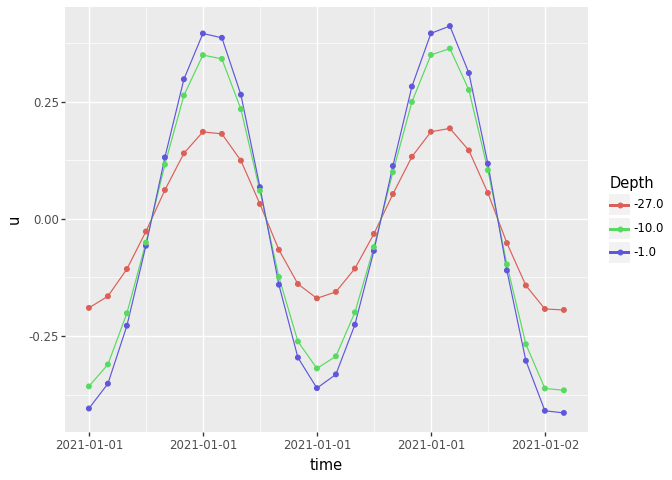

In [4]:
from plotnine import *

(
    ggplot(df, aes("time","u", color="factor(depth)"))
    + geom_line() + geom_point()
    + labs(color="Depth")

)


### Command line

In [5]:
!tidepredictor -x -2.75 -y 56.1 -s "2021-01-01" -e "2021-01-01 02:00:00" -i 30

time,level
2021-01-01T00:00:00Z,-0.442
2021-01-01T00:30:00Z,0.035
2021-01-01T01:00:00Z,0.498
2021-01-01T01:30:00Z,0.919
2021-01-01T02:00:00Z,1.277


All options are available as command line arguments.

In [6]:
!tidepredictor --help

                                                                                
 Usage: tidepredictor [OPTIONS]                                                 
                                                                                
 Predict the tides for a given location.                                        
                                                                                
╭─ Options ────────────────────────────────────────────────────────────────────╮
│ *  --lon                 -x      FLOAT RANGE           Longitude             │
│                                  [-180<=x<=180]        [default: None]       │
│                                                        [required]            │
│ *  --lat                 -y      FLOAT RANGE           Latitude              │
│                                  [-90<=x<=90]          [default: None]       │
│                                                        [required]            │
│    --start               -